# Customer Segmentation

The most successful companies today are the ones that know their customers so well that they can anticipate their needs. \
It is a key interest for the company in unlocking these in-depth insights, and segmenting the customers to better serve them.

We have therefore extracted one year of client data from our e-commerce website.

The anaysis will be done in following 4 steps: 

1. Create a cohort analysis to understand customer trends. 
2. Build easy to interpret customer segments. 
3. Prepare the segments that were created, making them ready for machine learning. 
4. Make the segments more powerful with k-means clustering

These steps will cover customer behavioral analytics and segmentation techniques.

Following KPI's will be analysed :
1. Client retention rate
2. Client average spending
3. Average quantity purchased
4. RFM analysis
3. Identification of customer segments through clustering


## 1. Cohort analysis

Cohort = mutually exclusive segment

We will look at the metrics metrics across customer lifecycle during one year. 

Cohorts are represented by a pivot table. The rows are the cohorts and the columns are ie. months\
The metrics are in the table.

Let's load and have a quick look at the data:

In [ ]:
import pandas as pd
online = pd.read_csv('data/online.csv', parse_dates = True)
online.head()
online.info()

: 

### Time cohorts

Group the clients by the time they made their first activity om the website.

In [ ]:
import datetime as dt
import pandas as pd

#online['InvoiceDate'] = pd.to_datetime(online['InvoiceDate'])

# Define a function that will parse the date
def get_day(x):
    x = pd.to_datetime(x)
    date = dt.datetime(x.year, x.month, x.day)
    return date 

def get_month(x):
    x = pd.to_datetime(x)
    date = dt.datetime(x.year, x.month, 1)
    return date 

# Create InvoiceDay column
online['InvoiceDay'] = online['InvoiceDate'].apply(get_day)

# Group by CustomerID and select the InvoiceDay value
grouping = online.groupby('CustomerID')['InvoiceDay'] 

# Assign a minimum InvoiceDay value to the dataset
online['CohortDay'] = grouping.transform('min')

# Do the same thing with CohortMonth
online['InvoiceMonth'] = online['InvoiceDate'].apply(get_month)
grouping = online.groupby('CustomerID')['InvoiceMonth']
online['CohortMonth'] = grouping.transform('min') 

print(online.head())

   Unnamed: 0  InvoiceNo StockCode                      Description  Quantity  \
0      416792     572558     22745       POPPY'S PLAYHOUSE BEDROOM          6   
1      482904     577485     23196    VINTAGE LEAF MAGNETIC NOTEPAD         1   
2      263743     560034     23299     FOOD COVER WITH BEADS SET 2          6   
3      495549     578307    72349B  SET/6 PURPLE BUTTERFLY T-LIGHTS         1   
4      204384     554656     21756         BATH BUILDING BLOCK WORD         3   

           InvoiceDate  UnitPrice  CustomerID         Country InvoiceDay  \
0  2011-10-25 08:26:00       2.10       14286  United Kingdom 2011-10-25   
1  2011-11-20 11:56:00       1.45       16360  United Kingdom 2011-11-20   
2  2011-07-14 13:35:00       3.75       13933  United Kingdom 2011-07-14   
3  2011-11-23 15:53:00       2.10       17290  United Kingdom 2011-11-23   
4  2011-05-25 13:36:00       5.95       17663  United Kingdom 2011-05-25   

   CohortDay InvoiceMonth CohortMonth  
0 2011-04-11   2

### Assign daily acquisition cohort
Defining a cohort is the first step to cohort analysis. We will now create daily cohorts based on the day each customer has made their first transaction.

### Calculate time offset in days - part 1
Calculating time offset for each transaction allows to report the metrics for each cohort in a comparable fashion.

First, we will create 6 variables that capture the integer value of years, months and days for _Invoice_ and _Cohort Date_.

In [ ]:
# Helper function
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

# Get the integers for date parts from the `InvoiceDay` column
invoice_year, invoice_month, invoice_day = get_date_int(online, 'InvoiceDay')

# Get the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, cohort_day = get_date_int(online, 'CohortDay')

# Get the integers for date parts from the `InvoiceDay` column
invoice_year, invoice_month, _ = get_date_int(online, 'InvoiceMonth')

# Get the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, _ = get_date_int(online, 'CohortMonth')

### Calculate time offset in days - part 2

Now, we have six different data sets with year, month and day values for Invoice and Cohort dates - invoice_year, cohort_year, invoice_month, cohort_month, invoice_day, and cohort_day.

Will now calculate the difference between the Invoice and Cohort dates in years, months and days separately and then calculate the total days difference between the two. This will be the days offset which we will use in the next step to visualize the customer count.

In [ ]:
# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# # Extract the difference in days from all previous values
online['CohortIndex'] = years_diff * 12 + months_diff + 1
print(online.head())


   Unnamed: 0  InvoiceNo StockCode                      Description  Quantity  \
0      416792     572558     22745       POPPY'S PLAYHOUSE BEDROOM          6   
1      482904     577485     23196    VINTAGE LEAF MAGNETIC NOTEPAD         1   
2      263743     560034     23299     FOOD COVER WITH BEADS SET 2          6   
3      495549     578307    72349B  SET/6 PURPLE BUTTERFLY T-LIGHTS         1   
4      204384     554656     21756         BATH BUILDING BLOCK WORD         3   

           InvoiceDate  UnitPrice  CustomerID         Country InvoiceDay  \
0  2011-10-25 08:26:00       2.10       14286  United Kingdom 2011-10-25   
1  2011-11-20 11:56:00       1.45       16360  United Kingdom 2011-11-20   
2  2011-07-14 13:35:00       3.75       13933  United Kingdom 2011-07-14   
3  2011-11-23 15:53:00       2.10       17290  United Kingdom 2011-11-23   
4  2011-05-25 13:36:00       5.95       17663  United Kingdom 2011-05-25   

   CohortDay InvoiceMonth CohortMonth  CohortIndex  
0 2

### Calculate retention rate

It' time to build the retention metrics and visualise it.



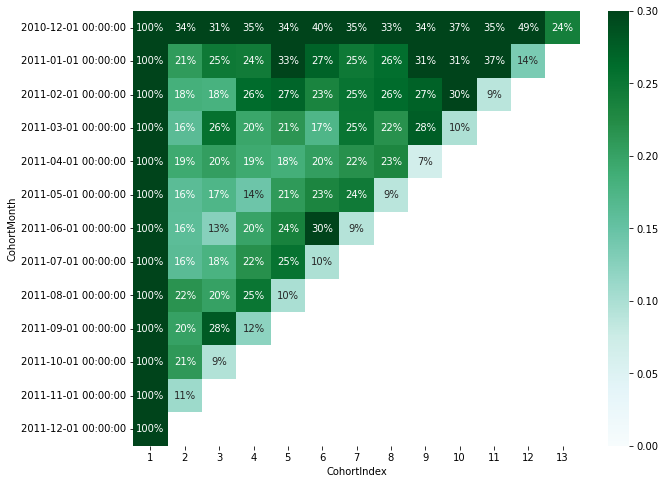

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

grouping = online.groupby(['CohortMonth', 'CohortIndex'])

# Count the number of unique values per customer ID
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()

# Create a pivot table
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)

plt.figure(figsize = (10,8))
#sns.lineplot(x = 'Date', y = 'Price',data = df)
sns.heatmap(data = retention,
            annot=True,
            fmt='.0%',
            vmin=0.0,
            vmax=0.3,
            cmap='BuGn',
            yticklabels=retention.index)
plt.show()

### Calculate average price

Let's now calculate the average price metric and analyze if there are any differences in shopping patterns across time and across cohorts.

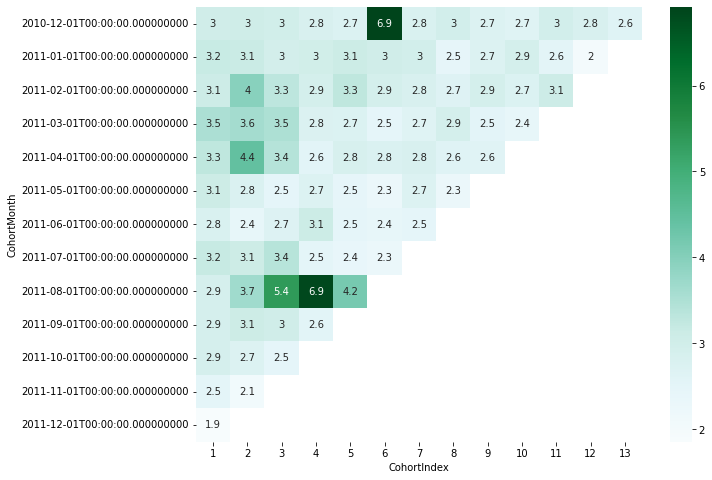

In [ ]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = online.groupby(['CohortMonth', 'CohortIndex'])

# Calculate the average of the unit price column
cohort_data = grouping['UnitPrice'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_price = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='UnitPrice')

plt.figure(figsize = (10,8))
g = sns.heatmap(data = average_price,
            annot=True,
            cmap='BuGn')
plt.show()

#print(average_price.round(1))

### Visualize average quantity metric

You are now going to visualize the average quantity of products purchased.

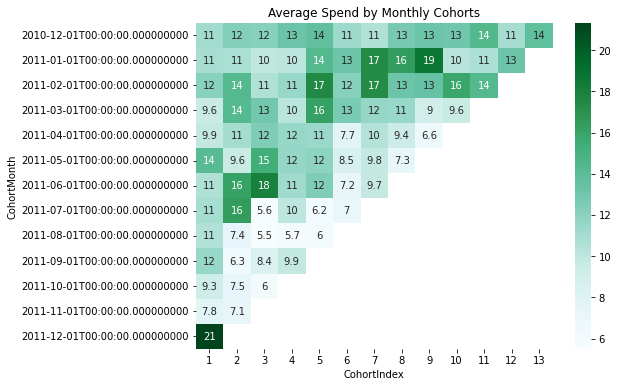

In [ ]:
# Import seaborn package as sns
import seaborn as sns
import matplotlib.pyplot as plt

grouping = online.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['Quantity'].mean()
cohort_data = cohort_data.reset_index()
average_quantity = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Quantity')

# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(8, 6))

# Add a title
plt.title('Average Spend by Monthly Cohorts')

# Create the heatmap
sns.heatmap(data = average_quantity, 
            annot=True,
            cmap='BuGn')
plt.show()

## 2. RFM analysis - Recency, Frequency, Monetary Value analysis

An RFM analysis evaluates which customers are of highest and lowest value to an organization based on purchase recency, frequency, and monetary value, in order to reasonably predict which customers are more likely to make purchases again in the future.

RFM analysis classifies customers with a numerical ranking for each of the three categories, with the ideal customer earning the highest score in each of the three categories.

__RFM Segmentation__

- Recency - days since last customer transaction (lower is better)
- Frequency - number of transactions the last 12 months
- Monetary segmentation - total spend in the last 12 months

### Calculate RFM values
Calculate Recency, Frequency and Monetary values for the dataset we have used before.

There's a TotalSum column in the online dataset which has been calculated by multiplying Quantity and UnitPrice: online['Quantity'] * online['UnitPrice']

In [ ]:
import pandas as pd
import numpy as np
import datetime 

online['TotalSum'] = np.random.randint(0,8, online.shape[0])

snapshot_date = pd.to_datetime(max(online.InvoiceDate)) + datetime.timedelta(days=1)

# Calculate Recency, Frequency and Monetary value for each customer 
datamart = online.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - pd.to_datetime(x).max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'})

# Rename the columns 
datamart.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)

# Print top 5 rows
print(datamart.head())

            Recency  Frequency  MonetaryValue
CustomerID                                   
12747             2         27             70
12748             1        967           3400
12749             4         37            135
12820             3         17             46
12822            71          9             35


### Calculate 3 groups for recency and frequency
We will now group the customers into three separate groups based on Recency and Frequency, where we will group customers based on the MonetaryValue and finally calculate and RFM_Score.

In [ ]:
# Create labels for Recency and Frequency
r_labels = range(3, 0, -1); f_labels = range(1, 4)

# Assign these labels to three equal percentile groups 
r_groups = pd.qcut(datamart['Recency'], q=3, labels=r_labels)

# Assign these labels to three equal percentile groups 
f_groups = pd.qcut(datamart['Frequency'], q=3, labels=f_labels)

# Create new columns R and F
datamart = datamart.assign(R=r_groups.values, F=f_groups.values)

#### Calculate RFM Score

Let's now finish the job by assigning customers to three groups based on the _MonetaryValue percentiles_ and then calculate an RFM_Score which is a sum of the R, F, and M values.

In [ ]:
# Create labels for MonetaryValue
m_labels = range(1, 4)

# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(datamart['MonetaryValue'], q=3, labels=m_labels)

# Create new column M
datamart = datamart.assign(M=m_groups.values)

# Calculate RFM_Score
datamart['RFM_Score'] = datamart[['R','F','M']].sum(axis=1)
print(datamart['RFM_Score'].head())

CustomerID
12747    9
12748    9
12749    9
12820    8
12822    6
Name: RFM_Score, dtype: int64


### Creating custom segments

Create a custom segmentation based on RFM_Score values.

In [ ]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 10:
        return 'Top'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 10)):
        return 'Middle'
    else:
        return 'Low'

# Create a new variable RFM_Level
datamart['RFM_Level'] = datamart.apply(rfm_level, axis=1)

datamart_rfm = datamart

# Print the header with top 5 rows to the console
print(datamart.head())

            Recency  Frequency  MonetaryValue  R  F  M  RFM_Score RFM_Level
CustomerID                                                                 
12747             2         27             70  3  3  3          9    Middle
12748             1        967           3400  3  3  3          9    Middle
12749             4         37            135  3  3  3          9    Middle
12820             3         17             46  3  3  2          8    Middle
12822            71          9             35  2  2  2          6    Middle


### Analyzing custom segments

As a final step, we will analyze average values of Recency, Frequency and MonetaryValue for the custom segments that have been created.

In [ ]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = datamart.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
  
  	# Return the size of each segment
    'MonetaryValue': ['mean', 'count']
}).round(1)

# Print the aggregated dataset
print(rfm_level_agg)

          Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Level                                      
Low         160.0       4.2          14.6  1679
Middle       39.7      31.5         111.1  2022


## 3. Data pre-processing for clustering

The data must be pre-processed and prepared for the clustering model, which is k-means in our case.

For k-means the data must be normally distributed and not skewed. \
This can be fixed with logarithmic transformation (works only on positive variables).

- K-means work well on variables with the same mean
- K-means work better on variables with the same variance / standard deviation
- Centering variables is done by subtracting average value from each observation
- Scaling variables is done by dividing them by standard deviation of each

### Pre-processing pipeline

1. Unskew the data -> log transformation
2. Standradize to the same averages values
3. Scale to the same standard deviation
4. Store as separate array to be used for clustering (k-Means works better with array than with dataframe)


### Visualize RFM distributions

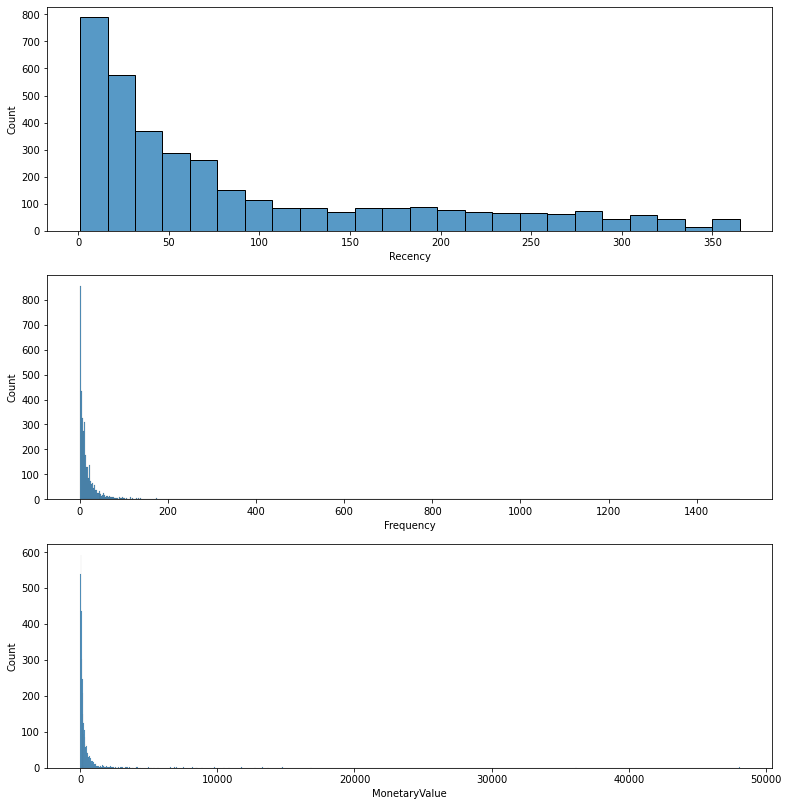

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

datamart_rfm = pd.read_csv('data/datamart_rfm_ch2.csv')

plt.figure(figsize=(13,14))

# Plot recency distribution
plt.subplot(3, 1, 1); sns.histplot(datamart_rfm['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.histplot(datamart_rfm['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.histplot(datamart_rfm['MonetaryValue'])

# Show the plot
plt.show()

### Pre-process RFM data


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Unskew the data
datamart_log = np.log(datamart_rfm)

# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(datamart_log)

# Scale and center the data
data_normalized = scaler.transform(datamart_log)

# Create a pandas DataFrame
datamart_normalized = pd.DataFrame(data=data_normalized, index=datamart_log.index, columns=datamart_rfm.columns)

### Visualize the normalized variables

Plot the normalized and unskewed variables to see the difference in the distribution as well as the range of the values.

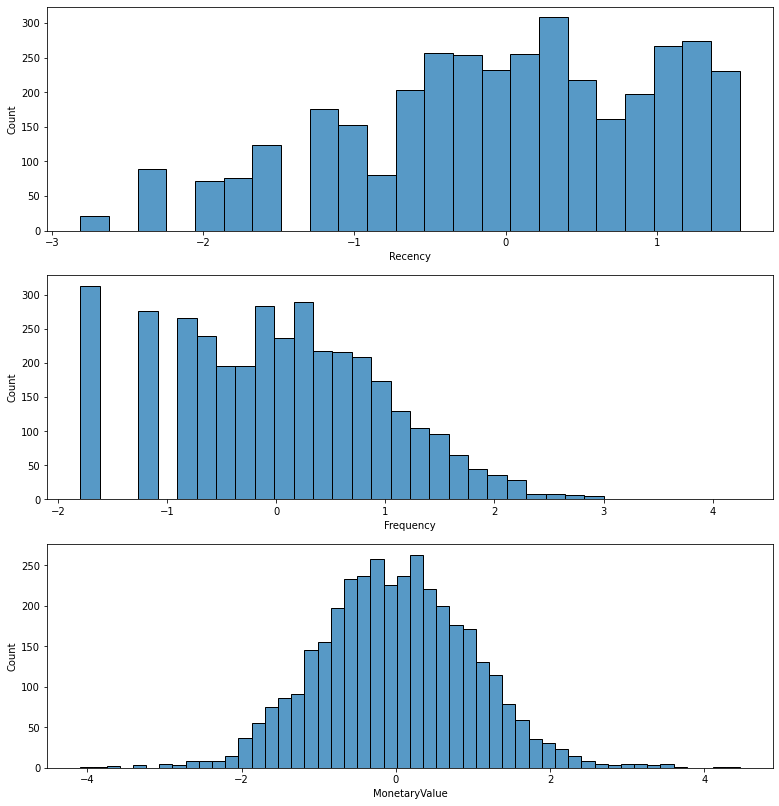

In [ ]:
plt.figure(figsize=(13,14))

# Plot recency distribution
plt.subplot(3, 1, 1); sns.histplot(datamart_normalized['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.histplot(datamart_normalized['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.histplot(datamart_normalized['MonetaryValue'])

# Show the plot
plt.show()

## 4. Clustering

We have chose k-means for clustering algoritm.

Key steps:
- Data pre-processing
- Choosing a number of clusters
- Running k-means clustering on pre-processed data
- Analyzing average RFM values of each cluster

Define the number of clusters can be done with:
- Visual methods - elbow criterion
- Mathematical memethods - silhouette coefficient
- Experimentation and interpretation

### Choosing the number of clusters

Below we will calculate the sum of squared errors for different number of clusters ranging from 1 to 20.

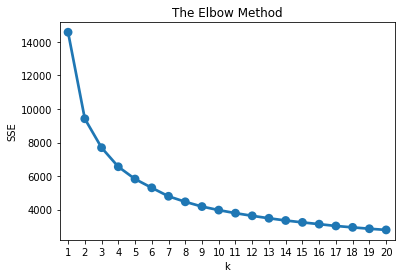

In [ ]:
from sklearn.cluster import KMeans

sse = {}

# Fit KMeans and calculate SSE for each k
for k in range(1, 21):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(data_normalized)
    
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_

# Add the plot title "The Elbow Method"
plt.title('The Elbow Method')

# Add X-axis label "k"
plt.xlabel('k')

# Add Y-axis label "SSE"
plt.ylabel('SSE')

# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

The elbow graph does not give a clear answer, so we are trying with both 2 and 3 clusters.

### Running k-means

Will now build a 3 clusters with k-means clustering.

In [ ]:
# Import KMeans 
from sklearn.cluster import KMeans

# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(datamart_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

#### Assign labels to raw data

You will now analyze the average RFM values of the three clusters you've created in the previous exercise. We have loaded the raw RFM dataset as datamart_rfm, and the cluster labels as cluster_labels. 

In [ ]:
# Create a DataFrame by adding a new cluster label column
datamart_rfm_k3 = datamart_rfm.assign(Cluster=cluster_labels)

# Group the data by cluster
grouped = datamart_rfm_k3.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         125.0       6.9         133.3  1075
1          26.3      40.2         822.0  1327
2         129.1       6.0          93.7  1241

#### Customer Segmentation with K-means

Key steps:
- Data pre-processing
- Choosing a number of clusters
- Running k-means clustering on pre-processed data
- Analyzing average RFM values of each cluster

Define the number of clusters can be done with:
- Visual methods - elbow criterion
- Mathematical memethods - silhouette coefficient
- Experimentation and interpretation

#### Running the algoritm

You will now build a 3 clusters with k-means clustering. We have loaded the pre-processed RFM dataset as datamart_normalized.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

datamart_rfm = pd.read_csv('data/datamart_rfm_ch4.csv')

# Unskew the data
datamart_log = np.log(datamart_rfm)

# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(datamart_log)

# Scale and center the data
data_normalized = scaler.transform(datamart_log)


In [ ]:
# Import KMeans 
from sklearn.cluster import KMeans

# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(data_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

#### Assign labels to raw data

You will now analyze the average RFM values of the three clusters you've created in the previous exercise. We have loaded the raw RFM dataset as datamart_rfm, and the cluster labels as cluster_labels. 

In [ ]:
# Create a DataFrame by adding a new cluster label column
datamart_rfm_k3 = datamart_rfm.assign(Cluster=cluster_labels)

# Group the data by cluster
grouped = datamart_rfm_k3.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         125.0       6.9         133.3  1075
1          26.3      40.2         822.0  1327
2         129.1       6.0          93.7  1241

## 5. Profile and interpret segments

Below we will show different customer profiling techniques.

### Approaches to build customes personas
- Summary statistics for each cluster e.g. average RFM values
- Snake plots
- Relative importance of cluster attributes compared to population


### Snake plot

Snake plot is a good way of visualizing the different clusters and their features.
It is a good market research technique to compare different segments

#### Prepare data for the snake plot

Now you will prepare data for the snake plot. You will use the 3-cluster RFM segmentation solution you have built previously. You will transform the normalized RFM data into a long format by "melting" the metric columns into two columns - one for the name of the metric, and another for the actual numeric value.

In [ ]:
datamart_normalized = pd.DataFrame(data=data_normalized, index=datamart_log.index, columns=datamart_rfm.columns)

datamart_normalized = datamart_normalized.assign(Cluster=cluster_labels)

# Melt the normalized dataset and reset the index
datamart_melt = pd.melt(
                    datamart_normalized.reset_index(), 
                        
                    # Assign CustomerID and Cluster as ID variables                  
                    id_vars=['CustomerID', 'Cluster'],

                    # Assign RFM values as value variables
                    value_vars=['Recency', 'Frequency', 'MonetaryValue'], 
                        
                    # Name the variable and value
                    var_name='Metric', value_name='Value'
                    )

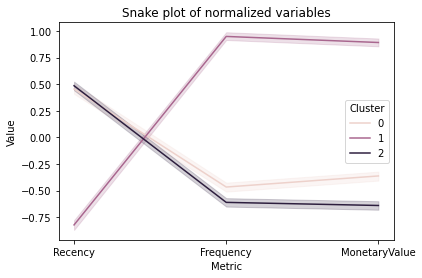

In [ ]:
# Add the plot title
plt.title('Snake plot of normalized variables')

# Add the x axis label
plt.xlabel('Metric')

# Add the y axis label
plt.ylabel('Value')

# Plot a line for each value of the cluster variable
sns.lineplot(data=datamart_melt, x='Metric', y='Value', hue='Cluster')
plt.show()

### Calculate relative importance of each attribute

We will calculate the relative importance of the RFM values within each cluster.

In [ ]:
# Calculate average RFM values for each cluster
cluster_avg = datamart_rfm_k3.groupby(['Cluster']).mean() 

# Calculate average RFM values for the total customer population
population_avg = datamart_rfm.mean()

# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1

# Print relative importance score rounded to 2 decimals
print(relative_imp.round(2))

         CustomerID  Recency  Frequency  MonetaryValue
Cluster                                               
0             -0.10     0.38      -0.63          -0.64
1              0.01    -0.71       1.15           1.22
2              0.08     0.43      -0.68          -0.75


### Plot relative importance heatmap

Let's now build a heatmap visualizing the relative scores for each cluster.

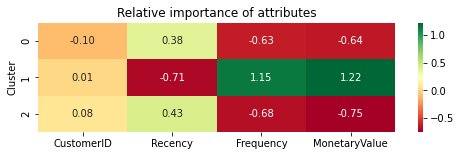

In [ ]:
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(8, 2))

# Add the plot title
plt.title('Relative importance of attributes')

# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

## 6. Conclusion

As we can see from the heatmap 1 cluster seems to be very interesting from the point of view of Frequency and MonetaryValue.

__This group of clients purchase often and spend the most money or our website.__